In [1]:
# 📦 Import essential libraries for data analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# Load the historical trader data containing individual trade details
hist_df = pd.read_csv('historical_data.csv')

# Load the Fear and Greed index data containing market sentiment classifications
fg_df = pd.read_csv('fear_greed_index.csv')

In [3]:
# 👀 Preview the first 5 rows of the historical trader dataset
hist_df.head(5)

# 👀 Preview the first 5 rows of the market sentiment classifications
fg_df.head(

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [31]:
# Check data types and nulls
hist_df.info()
fg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [34]:
# 🔍 Check the data types of each column in the historical trader dataset
hist_df.dtypes

Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           float64
dtype: object

In [33]:
# 🔍 Check the data types of each column 
fg_df.dtypes

timestamp          int64
value              int64
classification    object
date              object
dtype: object

In [35]:
# 🗓️ Convert 'Timestamp IST' column in historical data to proper datetime format
hist_df['Timestamp IST'] = pd.to_datetime(hist_df['Timestamp IST'], errors='coerce')

# 🗓️ Convert 'date' column in Fear & Greed data to datetime format
fg_df['date'] = pd.to_datetime(fg_df['date'], errors='coerce')


In [8]:
# Extract only Date from given column

hist_df['Trade Date'] = hist_df['Timestamp IST'].dt.date
fg_df['Sentiment Date'] = fg_df['date'].dt.date

In [9]:
# Show total missing values per column
print(hist_df.isnull().sum())
print(fg_df.isnull().sum())

Account                  0
Coin                     0
Execution Price          0
Size Tokens              0
Size USD                 0
Side                     0
Timestamp IST       131999
Start Position           0
Direction                0
Closed PnL               0
Transaction Hash         0
Order ID                 0
Crossed                  0
Fee                      0
Trade ID                 0
Timestamp                0
Trade Date          131999
dtype: int64
timestamp         0
value             0
classification    0
date              0
Sentiment Date    0
dtype: int64


In [10]:
# Drop the missing value 

hist_df = hist_df.dropna(subset=['Timestamp IST'])
fg_df = fg_df.dropna(subset=['date', 'classification'])

In [12]:
# ✂️ Select only the important columns needed for analysis and merging

# From the historical trader data:
# Keep account info, coin traded, timestamp, profit/loss, trade direction, trade size, and trade date
hist_trimmed = hist_df[['Account', 'Coin', 'Timestamp IST', 'Closed PnL', 'Side', 'Size USD', 'Trade Date']]

# From the Fear & Greed data:
# Keep the sentiment date and the classification (e.g., Fear, Greed)
fg_trimmed = fg_df[['Sentiment Date', 'classification']]


In [13]:
# 🔗 Merge the historical trade data with the sentiment data on the date fields
merged_df = pd.merge(
    hist_trimmed,
    fg_trimmed,
    left_on='Trade Date',
    right_on='Sentiment Date',
    how='left'  # keeps all trades
)

# Remove the column after merging
merged_df.drop(columns=['Sentiment Date'], inplace=True)

In [14]:
# First 5 rows of merged dataframe 
merged_df.head(5)

,Account,Coin,Timestamp IST,Closed PnL,Side,Size USD,Trade Date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,2024-02-12 22:50:00,0.0,BUY,7872.16,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,2024-02-12 22:50:00,0.0,BUY,127.68,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,2024-02-12 22:50:00,0.0,BUY,1150.63,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,2024-02-12 22:50:00,0.0,BUY,1142.04,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,2024-02-12 22:50:00,0.0,BUY,69.75,2024-02-12,Greed


In [36]:
# 📊 Count the number of trades under each market sentiment classification
merged_df['classification'].value_counts()


classification
Fear             13869
Greed            11292
Extreme Greed     5621
Neutral           2756
Extreme Fear      2326
Name: count, dtype: int64

In [16]:
merged_df.groupby('classification')['Closed PnL'].mean()

classification
Extreme Fear       1.891632
Extreme Greed    205.816345
Fear             128.287950
Greed             53.988003
Neutral           27.088803
Name: Closed PnL, dtype: float64

## 1. Trader Performance and Sentiment

- Highest Profit in Extreme Greed
💡 Trades executed during Extreme Greed resulted in the highest average profit (+205.82 USD). This suggests that highly optimistic market conditions create strong trading opportunities, possibly due to strong momentum and trend continuation.

- Positive PnL Even During Fear
💡 Surprisingly, Fear days showed a relatively high average profit (+128.29 USD), even outperforming Greed (+53.99 USD). This may indicate that skilled traders take advantage of market dips or volatility.

- Neutral Sentiment = Lower Opportunity
💡 During Neutral sentiment, average PnL drops to only +27.09 USD, suggesting fewer directional moves and more sideways market activity, which could reduce trade profitability.

- Extreme Fear Leads to Lowest Profits
💡 While still slightly positive, Extreme Fear trades had the lowest average profit (+1.89 USD). Traders may be highly risk-averse in this condition or stop losses might be tighter, leading to minimal gains.

In [17]:
merged_df.groupby('classification')['Size USD'].mean()


classification
Extreme Fear     4118.761840
Extreme Greed    3242.085086
Fear             5744.782685
Greed            5051.878829
Neutral          4332.202906
Name: Size USD, dtype: float64

##  2. Trade Volume and Behavior
📌 1. Highest Risk Taken During Fear
💡 Average trade size peaks during Fear ($5744.78), which is surprising — it suggests traders are willing to risk larger capital when the market is showing signs of uncertainty or minor panic.

📌 2. Risk Reduces as Sentiment Becomes More Extreme
💡 In both Extreme Fear ($4118.76) and Extreme Greed ($3242.09), trade sizes shrink, implying that traders may either scale back risk or take quick profits in highly volatile emotional environments.

📌 3. Moderate Greed > Extreme Greed in Trade Size
💡 Interestingly, average trade size during regular Greed ($5051.88) is much higher than in Extreme Greed, which may indicate that traders become more cautious at market tops or after big runs.

📌 4. Neutral = Balanced Exposure
💡 In Neutral conditions, the average size is in the mid-range ($4332.20), which makes sense — there's no strong bias or pressure, so traders neither over- nor under-commit.

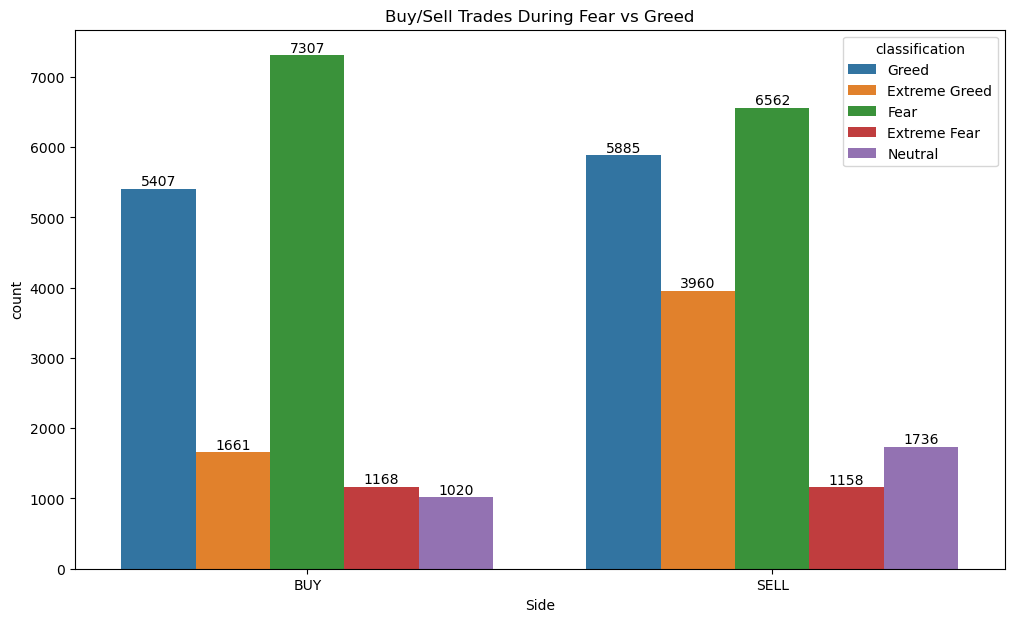

In [18]:
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=merged_df, x='Side', hue='classification')

# Title
plt.title('Buy/Sell Trades During Fear vs Greed')

# Add data labels on each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # skip empty bars
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.show()

## 3. Buy Vs Sell
- Greed and Extreme Greed:
These classifications show a wide distribution of Closed PnL, with the median PnL for both appearing to be around zero or slightly positive. There are also notable outliers, especially in the "Greed" category, indicating instances of significant positive PnL.
- Fear and Extreme Fear:
These classifications tend to be associated with negative Closed PnL, as indicated by the lower position of their box plots on the y-axis. The median PnL for "Fear" and "Extreme Fear" is clearly negative, suggesting that fear-driven decisions often lead to losses.

In [19]:
merged_df.groupby(['Coin', 'classification'])['Closed PnL'].mean()


Coin   classification
@1     Fear               8.664499
       Greed            -47.982752
@10    Fear               0.000000
       Greed             -0.031742
@103   Greed              4.985462
                           ...    
kPEPE  Greed             74.777789
       Neutral           87.187667
kSHIB  Extreme Greed     -3.982488
       Fear               0.000000
       Greed              0.000000
Name: Closed PnL, Length: 462, dtype: float64

## 4. Coin-Specific Behavior
📌 1. Coin Performance Varies Significantly by Sentiment
💡 Some coins (like @1) have positive PnL under Fear but lose money under Greed — this suggests their price movements may behave contrarian to sentiment.

📌 2. Certain Coins Perform Best Under Neutral/Greed
💡 Coins like kPEPE and kSHIB showed higher average profits during Neutral or Greed, which may make them suitable for sentiment-driven trend trading strategies.

📌 3. Some Coins Show Zero or Minimal Trading in Certain Moods
💡 For example, @10 has 0.0 PnL in Fear, suggesting no trading or no PnL change — this helps identify coins not actively traded under specific market sentiments.

📌 4. Extreme Sentiment Can Lead to Negative Outcomes
💡 Some coins under Extreme Greed (like kSHIB: -3.98 USD) actually produce losses. This may be due to overbought conditions, suggesting a reversal or high volatility risk.

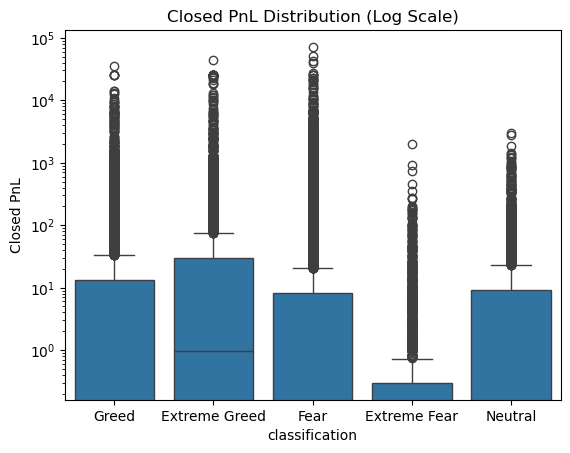

In [26]:

sns.boxplot(x='classification', y='Closed PnL', data=merged_df)
plt.yscale('log')  
plt.title('Closed PnL Distribution (Log Scale)')
plt.show()


## 5. Risk Insight
- Median PnL:
The line inside each box represents the median Closed PnL for that classification. Comparing these lines reveals how the typical PnL differs across sentiment categories.
- Interquartile Range (IQR)(Q3 - Q1):
The box itself represents the IQR, spanning from the 25th to the 75th percentile of Closed PnL. A wider box indicates greater variability in PnL within that classification.
- Outliers:
Individual points beyond the whiskers indicate outliers, representing unusually high or low Closed PnL values for a given sentiment category.
- Skewness:
The position of the median within the box and the length of the whiskers can suggest the skewness of the PnL distribution for each classification. For example, a median closer to the bottom of the box with a longer upper whisker suggests a positive skew.

## 6. Conclusion
Market sentiment has a measurable influence on trader behavior and performance. By integrating sentiment into trading decisions—especially when choosing coins or managing trade size—traders can align with market psychology and potentially improve returns while managing risk.